# GLORIA OOD

In [1]:
# imports
import numpy as np
from importlib import reload

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from datetime import datetime, time
import random 

import pandas
import seaborn as sns

from oceancolor.hydrolight import loisel23
from oceancolor.insitu import gloria
from oceancolor.utils import spectra

In [2]:
%matplotlib ipympl

# Load up

## GLORIA

In [3]:
reload(gloria)
df_meta, df_Rrs, df_Rrs_std, df_qc_flags = gloria.load_gloria()

Loading GLORIA dataset...


In [4]:
reload(gloria)
gloria_wv, gloria_Rrs, _ = gloria.parse_table(df_Rrs, 'Rrs')

In [5]:
gloria_wv[0:5]

array([350., 351., 352., 353., 354.])

In [6]:
gloria_Rrs[0:5,0]

array([0.00123054, 0.00121439, 0.0012143 , 0.00122485, 0.00121499])

### Error

In [7]:
_, gloria_Rrs_std, _ = gloria.parse_table(df_Rrs_std, 'Rrs_std')

In [8]:
gloria_Rrs_std.shape

(551, 7572)

## L23

In [9]:
X,Y = 4,0
l23_ds = loisel23.load_ds(X, Y)

# Wavelengths, restricted to > 400 nm
#cut = (l23_ds.Lambda > min_wv) & (l23_ds.Lambda < high_cut)
l23_a = l23_ds.a.data[:]
l23_wave = l23_ds.Lambda.data

l23_Rs = l23_ds.Rrs.data[:]

# Rebin/cut GLORIA to L23

In [10]:
gloria_wv[:10]

array([350., 351., 352., 353., 354., 355., 356., 357., 358., 359.])

In [11]:
reload(spectra)
new_gloria_wv = np.append(l23_wave, [l23_wave.max()+5.]) - 2.5 # Because the rebinning is not interpolation
#
rwv_nm, gloria_rebin, gloria_rebin_sig = spectra.rebin_to_grid(gloria_wv, gloria_Rrs, gloria_Rrs_std, new_gloria_wv)

/home/xavier/Projects/Oceanography/python/ocean-color/oceancolor/utils/spectra.py:66: RuntimeWarning: invalid value encountered in divide
  isum = np.nansum(values[gd]*mask[gd], axis=0) / mask_sum
/home/xavier/Projects/Oceanography/python/ocean-color/oceancolor/utils/spectra.py:67: RuntimeWarning: invalid value encountered in divide
  esum = np.nansum(err_vals[gd]*mask[gd], axis=0) / mask_sum


In [12]:
new_gloria_wv.size

82

In [13]:
gloria_rebin.shape

(7572, 81)

In [16]:
df_Rrs.iloc[100]

GLORIA_ID     GID_102
Rrs_350           NaN
Rrs_351           NaN
Rrs_352           NaN
Rrs_353      0.001844
               ...   
Rrs_896      0.000626
Rrs_897      0.000626
Rrs_898      0.000626
Rrs_899      0.000618
Rrs_900      0.000614
Name: 100, Length: 552, dtype: object

In [17]:
gloria_rebin[100,:]

array([       nan, 0.00188968, 0.00203106, 0.00204399, 0.00211614,
       0.00219932, 0.00228708, 0.0023789 , 0.00244125, 0.00253182,
       0.00256547, 0.00267144, 0.00279333, 0.00290989, 0.00303992,
       0.00319873, 0.00336722, 0.00352745, 0.0037197 , 0.00394843,
       0.00419938, 0.00446004, 0.00470994, 0.00496251, 0.00522366,
       0.00549076, 0.00576666, 0.00604181, 0.00631253, 0.0065981 ,
       0.00692572, 0.00727125, 0.00763418, 0.00802025, 0.00840734,
       0.00878076, 0.00915602, 0.00952366, 0.00986902, 0.01018552,
       0.01048417, 0.01079134, 0.01108932, 0.01134823, 0.0115735 ,
       0.01175512, 0.01183089, 0.01173341, 0.01142204, 0.01083854,
       0.0101258 , 0.0095638 , 0.00924399, 0.00904444, 0.0088852 ,
       0.00875291, 0.00864387, 0.00853056, 0.00841452, 0.00828167,
       0.00808592, 0.00774578, 0.00727224, 0.00687234, 0.00661164,
       0.0064559 , 0.00641532, 0.00647177, 0.00643019, 0.0061592 ,
       0.0057399 , 0.00519764, 0.00459588, 0.00399404, 0.00335

## Plot a few 

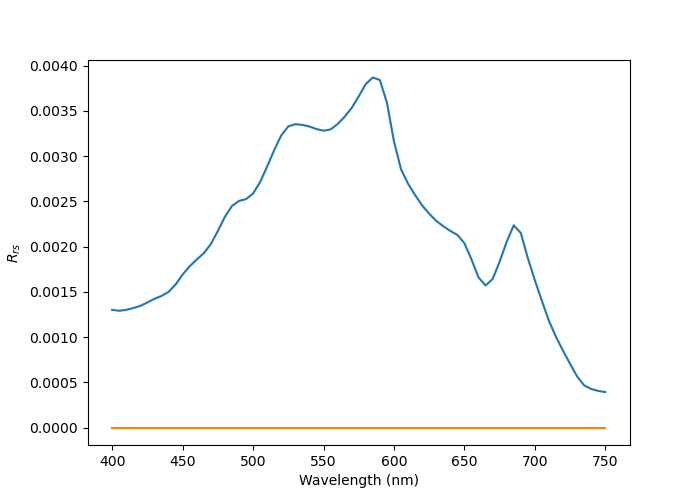

In [20]:
idx = 5000
gd = np.isfinite(gloria_rebin[idx,:])

fig = plt.figure(figsize=(7,5))

plt.clf()
ax = plt.gca()
ax.plot(rwv_nm[gd], gloria_rebin[idx,gd])#, label=r'$a_g$')
ax.plot(rwv_nm[gd], gloria_rebin_sig[idx,gd])#, label=r'$a_g$')
#
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel(r'$R_{rs}$')
#ax.legend()
#
plt.show()